In [1]:
using LinearAlgebra
using Plots

In [2]:
n=3
E,=qr(randn(n,n))
E1=E[:,1:2]
E2=E[:,3:end]
F,=qr(randn(n,n))
F1=F[:,1:2]
F2=F[:,3:end]

3×1 Matrix{Float64}:
 -0.28693020149287074
 -0.9492072994646019
  0.12913776409082633

In [3]:
function plot_matrix_as_plane(A; grid_size=10)
    # Extrair os dois vetores coluna da matriz
    v1 = A[:, 1]
    v2 = A[:, 2]

    # Gerar uma grade de pontos no plano
    u = range(-1, 1, length=grid_size)
    v = range(-1, 1, length=grid_size)
    X = [v1[1] * ui + v2[1] * vi for ui in u, vi in v]
    Y = [v1[2] * ui + v2[2] * vi for ui in u, vi in v]
    Z = [v1[3] * ui + v2[3] * vi for ui in u, vi in v]

    # Definir os ticks manualmente
    xticks = range(minimum(X), maximum(X), length=5)  # 5 ticks no eixo x
    yticks = range(minimum(Y), maximum(Y), length=5)  # 5 ticks no eixo y
    zticks = range(minimum(Z), maximum(Z), length=5)  # 5 ticks no eixo z

    # Plotar a superfície
    surface(X, Y, Z, color=:blue, alpha=0.5, legend=false,
            xticks=xticks, yticks=yticks, zticks=zticks)
    xlabel!("X")
    ylabel!("Y")
    zlabel!("Z")
    title!("Plano definido pela matriz 3x2")
end

plot_matrix_as_plane (generic function with 1 method)

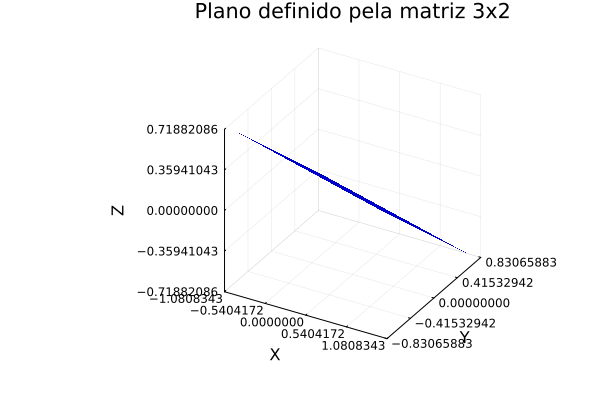

In [4]:
plot_matrix_as_plane(E1)

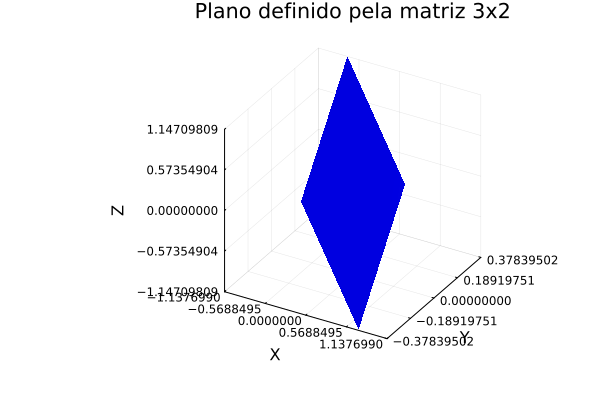

In [5]:
plot_matrix_as_plane(F1)

In [6]:
U1,S11,V1=svd(E1'*F1,full=true)
temp,S12,V2=svd(E1'*F2,full=true)
U2,S22,V2=svd(E2'*F2,full=true)
D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
 U2'*E2'*F1*V1 U2'*E2'*F2*V2]
U=[U1 zeros(2,n-2)
 zeros(n-2,2) U2]
W=E*U*D*U'*E'

3×3 Matrix{Float64}:
  0.955903  -0.117605  0.269107
 -0.174893   0.50816   0.843318
 -0.235928  -0.853196  0.465183

In [7]:
D

3×3 Matrix{Float64}:
  1.0          -1.11022e-16  2.78083e-16
 -2.08167e-16   0.464623     0.885509
 -3.32506e-16  -0.885509     0.464623

In [8]:
norm(E*U*D*U'*E'*E1-F1)

2.0

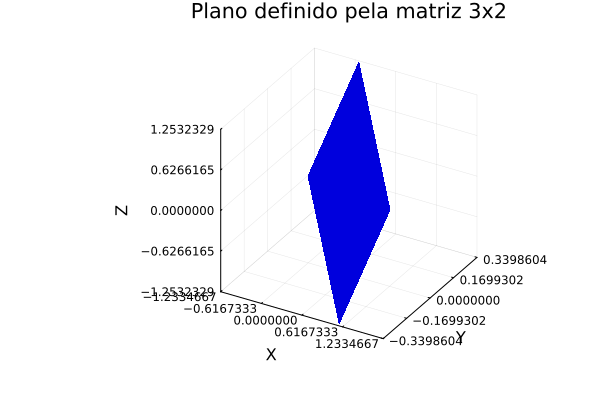

In [9]:
plot_matrix_as_plane(W*E1)

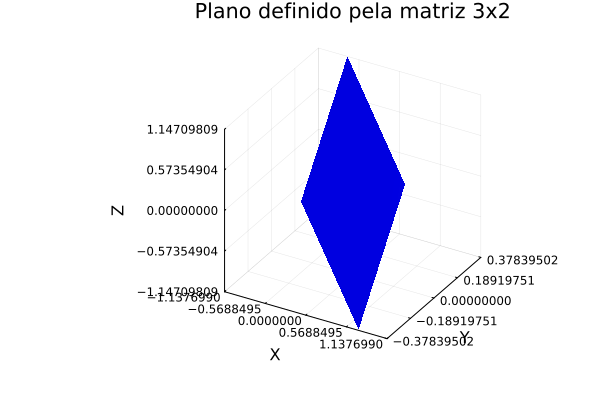

In [10]:
plot_matrix_as_plane(F1)

In [11]:
norm(W*E1*U1-F1)

2.81356733050693

In [12]:
norm(W*E1*U1*V1'-F1)

9.651799387161475e-16

In [13]:
norm(D'*D-(1* Matrix(I, n, n)))

5.361146271962816e-16

In [14]:
norm(W'*W-(1* Matrix(I, n, n)))

1.161264890995996e-15

In [15]:
rotated=W*E1*U1
norm(rotated-F1*V1)

9.172509291644378e-16

In [16]:
function draw(M)
    x=M[:,1]
    y=M[:,2]
    z=x+im*y
    e=z.^2
    #print(norm(e[1]+e[2]+e[3]),"\n")
    #print(norm(e[1])+norm(e[2])+norm(e[3]))
    E=[real(e)' ; imag(e)']
    points=[zeros(2,1) E[:,1] E[:,1] E[:,1]+E[:,2] E[:,1]+E[:,2] E[:,1]+E[:,2]+E[:,3] E[:,1]+E[:,2]+E[:,3]]
    return points
end

draw (generic function with 1 method)

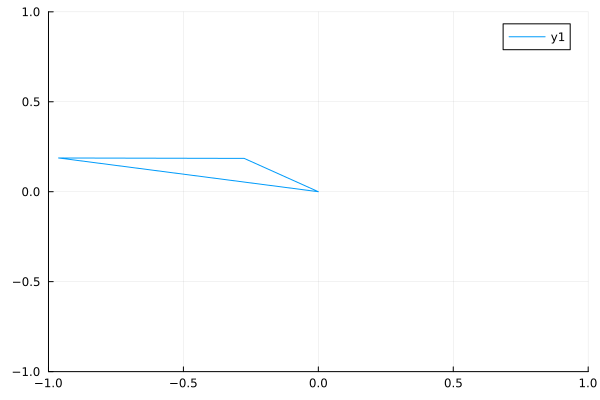

In [17]:
points=draw(E1)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

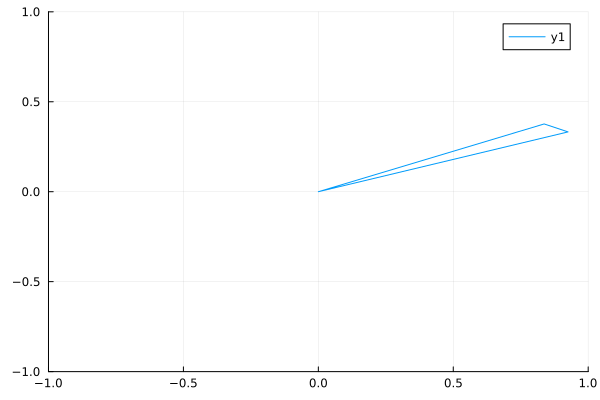

In [18]:
points=draw(F1)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

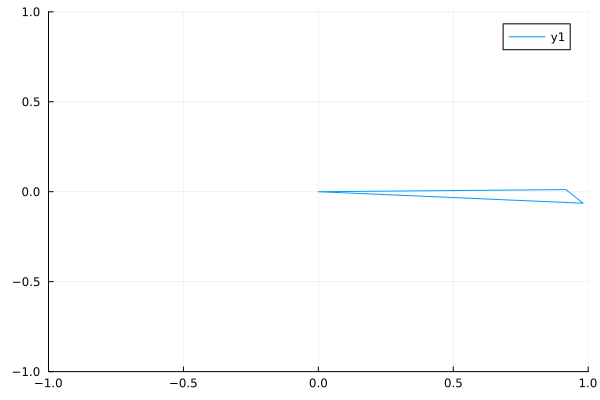

In [19]:
points=draw(W*E1*U1)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])